1. Воспроизводим пример из книги https://drive.google.com/file/d/18V_Af3NA7Lg73s8jmWUgBew88C0JjQHv/view?usp=sharing, из параграфа 15.6 .

Пример состоит в создании сверточной нейронной сети для классификации рукописных цифр с большим количеством признаков

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Импортируем датасет и загружаем его

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
X_test.shape

(10000, 28, 28)

In [40]:
y_test.shape

(10000,)

Визуализируем данные

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

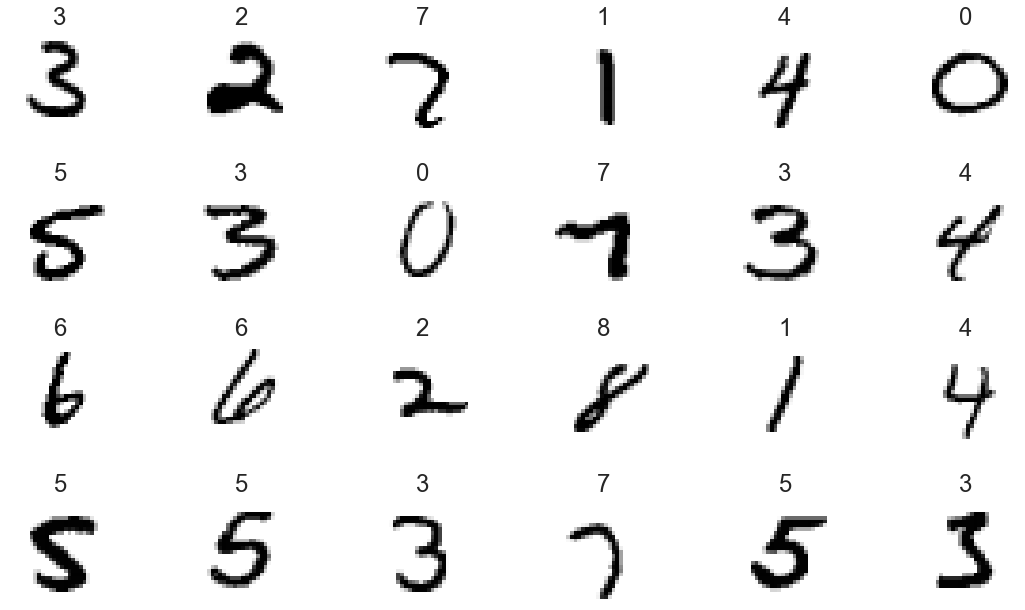

In [13]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) 
    axes.set_yticks([]) 
    axes.set_title(target)
    plt.tight_layout()

Приводим данные к форме для подачи на обучение

In [14]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [17]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Приводим метки к категорийному типу

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train)

In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Конструируем нейронную сеть

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
cnn = Sequential()

In [23]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [24]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

In [25]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [26]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [27]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [28]:
cnn.add(Flatten())

In [29]:
cnn.add(Dense(units=128, activation='relu'))

In [30]:
cnn.add(Dense(units=10, activation='softmax'))

In [31]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

Компилируем и обучаем нейронную сеть

In [37]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 201s 236ms/step - loss: 0.1467 - accuracy: 0.9549 - val_loss: 0.0408 - val_accuracy: 0.9890
Epoch 2/5
844/844 [==============================] - 197s 233ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0360 - val_accuracy: 0.9885
Epoch 3/5
844/844 [==============================] - 199s 236ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0386 - val_accuracy: 0.9882
Epoch 4/5
844/844 [==============================] - 195s 231ms/step - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0323 - val_accuracy: 0.9905
Epoch 5/5
844/844 [==============================] - 198s 234ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0381 - val_accuracy: 0.9903


In [42]:
y_test = to_categorical(y_test)

In [43]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 11s 35ms/step - loss: 0.0289 - accuracy: 0.9918


In [44]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 11s 35ms/step


Находим и визуализируем образцы на которых сеть ошиблась

In [45]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000526%
1: 0.0000000153%
2: 0.0001949438%
3: 0.0000041491%
4: 0.0000000000%
5: 0.0000000686%
6: 0.0000000000%
7: 99.9997973442%
8: 0.0000002506%
9: 0.0000163360%


In [46]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))
len(incorrect_predictions)

82

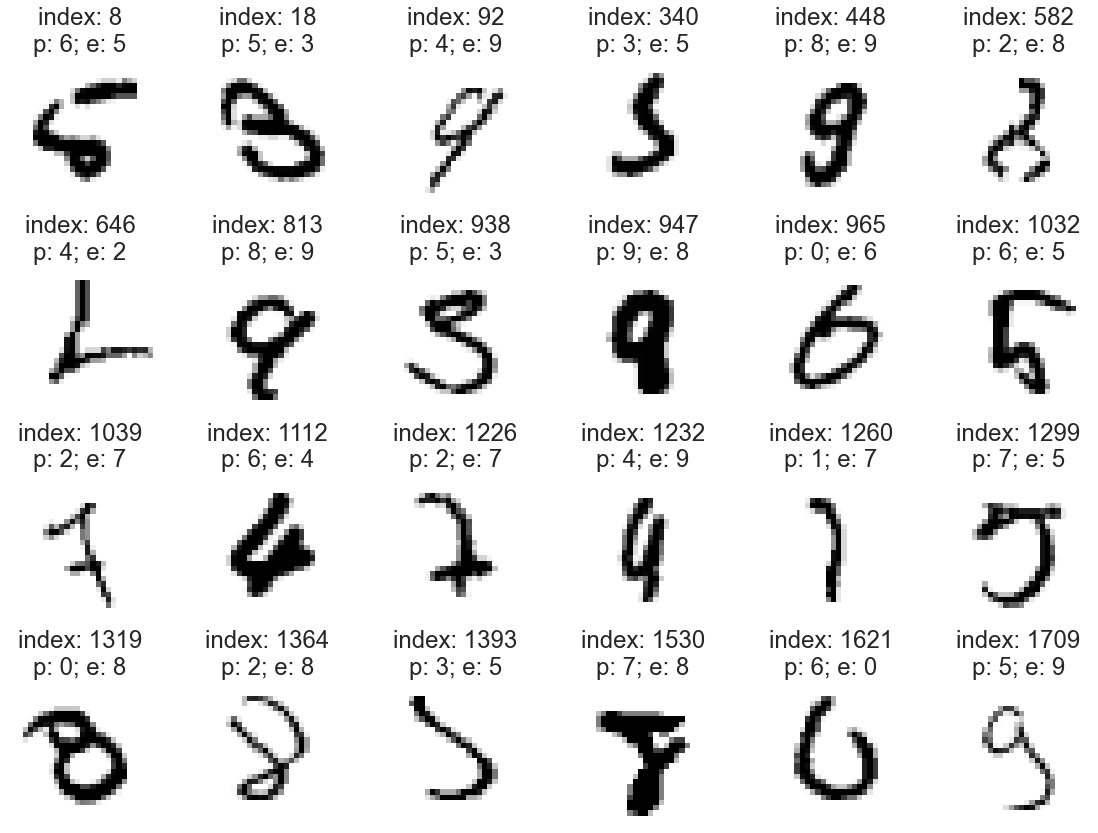

In [47]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [49]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [50]:
display_probabilities(predictions[495])

0: 0.6177512929%
1: 0.0000001081%
2: 0.0134405869%
3: 0.0000052766%
4: 0.0000195363%
5: 0.0000570732%
6: 11.8750125170%
7: 0.0000000001%
8: 87.4936103821%
9: 0.0001059601%


In [51]:
cnn.save('mnist_cnn.h5')

In [52]:
from tensorflow.keras.models import load_model
cnn = load_model('mnist_cnn.h5')